In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('pythondata.csv')

In [3]:
data

,Postcode,Town,Region N,Department Overseas (1 = yes 0 = no),Total Number of Employers,Unknown Size of Employers,1 to 5 employees,6 to 9 employees,10 to 19 employees,20 to 49 employees,50 to 99 employees,100 to 199 employees,200 to 499 employees,>500 employees
0,97201,L'Ajoupa-Bouillon,Martinique,1,104,92,11,1,0,0,0,0,0,0
1,97202,Les Anses-d'Arlet,Martinique,1,278,248,25,4,1,0,0,0,0,0
2,97203,Basse-Pointe,Martinique,1,236,175,48,7,5,1,0,0,0,0
3,97204,Le Carbet,Martinique,1,294,239,42,5,5,2,1,0,0,0
4,97205,Case-Pilote,Martinique,1,321,265,40,11,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36676,97130,Terre-de-Bas,�Guadeloupe,971,96,83,11,1,1,0,0,0,0,0
36677,97131,Terre-de-Haut,�Guadeloupe,971,229,171,48,6,4,0,0,0,0,0
36678,97132,Trois-Rivières,�Guadeloupe,971,633,546,69,9,6,1,1,1,0,0
36679,97133,Vieux-Fort,�Guadeloupe,971,77,72,4,1,0,0,0,0,0,0


## Cleaning the dataset

We can see in the dataset in the Region N column that there are some extra unknown character in the start of some of the Region names, therefore we remove it so that it don't cause any problems while we process it further.

In [4]:
data['Region N'] = data['Region N'].str.replace("�","")

In [5]:
data

,Postcode,Town,Region N,Department Overseas (1 = yes 0 = no),Total Number of Employers,Unknown Size of Employers,1 to 5 employees,6 to 9 employees,10 to 19 employees,20 to 49 employees,50 to 99 employees,100 to 199 employees,200 to 499 employees,>500 employees
0,97201,L'Ajoupa-Bouillon,Martinique,1,104,92,11,1,0,0,0,0,0,0
1,97202,Les Anses-d'Arlet,Martinique,1,278,248,25,4,1,0,0,0,0,0
2,97203,Basse-Pointe,Martinique,1,236,175,48,7,5,1,0,0,0,0
3,97204,Le Carbet,Martinique,1,294,239,42,5,5,2,1,0,0,0
4,97205,Case-Pilote,Martinique,1,321,265,40,11,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36676,97130,Terre-de-Bas,Guadeloupe,971,96,83,11,1,1,0,0,0,0,0
36677,97131,Terre-de-Haut,Guadeloupe,971,229,171,48,6,4,0,0,0,0,0
36678,97132,Trois-Rivières,Guadeloupe,971,633,546,69,9,6,1,1,1,0,0
36679,97133,Vieux-Fort,Guadeloupe,971,77,72,4,1,0,0,0,0,0,0


#### Checking if any null values exists in the dataframe

In [6]:
data.isnull().values.any()

False

The False output represents that there is no missing value in the dataset.

# 1)

#### How many towns ( column B ) have more than 10 values as Unknown size of employers. 
#### Calculate how many towns per region have the maximum unknown employers size and represent it in a bart chat

In [7]:
data[data['Unknown Size of Employers'] > 10]['Town'].count()

21856

We can see that 21856 Towns have unknown size of employers greater than 10.

In [8]:
regions = data['Region N'].unique().tolist()

In [9]:
regions

['Martinique',
 'French Guiana',
 'Reunion',
 'Mayotte',
 'le-de-France',
 'Grand East',
 'Hauts-de-France',
 'Normandy',
 'Centre-Val de Loire',
 'Bourgogne-Franche-Comt',
 'Nord',
 'north-eastern',
 'Pays de la Loire',
 'Brittany',
 'South Western ',
 'Central France',
 'Auvergne-Rhne-Alpes',
 'Occitanie',
 "Provence-Alpes-Cte d'Azur",
 'Corsica',
 'Guadeloupe']

In [10]:
regionMax = []

for region in regions:
    maxValue = data[data['Region N'] == region]['Unknown Size of Employers'].max()
    regionMax.append(maxValue)

In [11]:
print(regionMax)

[8974, 4848, 8090, 3970, 316603, 13604, 4322, 6002, 5509, 6326, 13148, 5507, 15381, 17800, 24584, 4766, 33047, 17495, 48557, 4245, 5612]


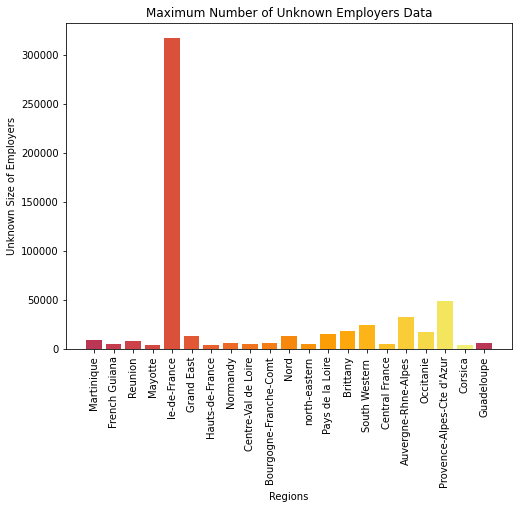

In [12]:
colors = cm.inferno_r(np.linspace(.5, .05, 20))
fig, ax = plt.subplots(figsize=(8,6))

plt.bar(regions, regionMax, align='center', color=colors)
plt.xlabel('Regions')
plt.ylabel('Unknown Size of Employers')
plt.title('Maximum Number of Unknown Employers Data')
plt.xticks(rotation = 90)
plt.show()

To perform the above mentioned query, we used the Pandas to find out the maximum number of unknown employers data in the given dataset. First of all, each unique region names were extracted using the **unique()** function of the pandas, and these extracted region names have been stored in the **regions** list. Then, the maximum number of the unknown size of the employers have been queried using the **for** loop, which loops through each entry in the dataframe and gets the maximum count for each region using the **max()** function of the pandas, and then it stores in the **regionMax** list.

Then using the Matplotlib library, these maximum counts stored in the **regionMax** list have been plotted in terms of the bar chart, in which x-axis shows the Regions' Names, and the y-axis represents the Unknown Size of Employeers. For visualization purpose, the bars have been given different colors.

We can see that the 'le-de-France' region has the maximum number (316603) of unknown employers data size which can also be interpreted as the maximum number of companies are present in this specific region compared to others.

#### We can also see which Town in the 'Le-De-France' has the maximum unknown size of employers

In [13]:
maxSizeIndex = data[data['Region N'] == 'le-de-France']['Unknown Size of Employers'].idxmax()
data.iloc[maxSizeIndex,:]

Postcode                                        75056
Town                                            Paris
Region N                                 le-de-France
Department Overseas (1 = yes 0 = no)               75
Total Number of Employers                      427385
Unknown Size of Employers                      316603
1 to 5 employees                                76368
6 to 9 employees                                14836
10 to 19 employees                              10829
20 to 49 employees                               5643
50 to 99 employees                               1658
100 to 199 employees                              812
200 to 499 employees                              456
>500 employees                                    180
Name: 97, dtype: object

We can see that the Paris has the most number of employers and the maximum number of unknown size of employers as well in the France region.

# 2)

#### Explore the relationship, if any, between regions ( column C ) and employers with more than 100 employees ( column L,M,N) . Determine if there is evidence to support that certain regions are hosting larger companies ( +100 employees ) and represent the in a graph if possible

Getting the total number of employers having employees in range of 100 to 199 region-wise

In [14]:
_100to199_Sum = []
for region in regions:
    _sum = data[data['Region N'] == region]['100 to 199 employees'].sum()
    _100to199_Sum.append(_sum)

Getting the total number of employers having employees in range of 200 to 499 region-wise

In [15]:
_200to499_Sum = []
for region in regions:
    _sum = data[data['Region N'] == region]['200 to 499 employees'].sum()
    _200to499_Sum.append(_sum)

Getting the total number of employers having employees greater than 500 region-wise

In [16]:
_gt500_Sum = []
for region in regions:
    _sum = data[data['Region N'] == region]['>500 employees'].sum()
    _gt500_Sum.append(_sum)

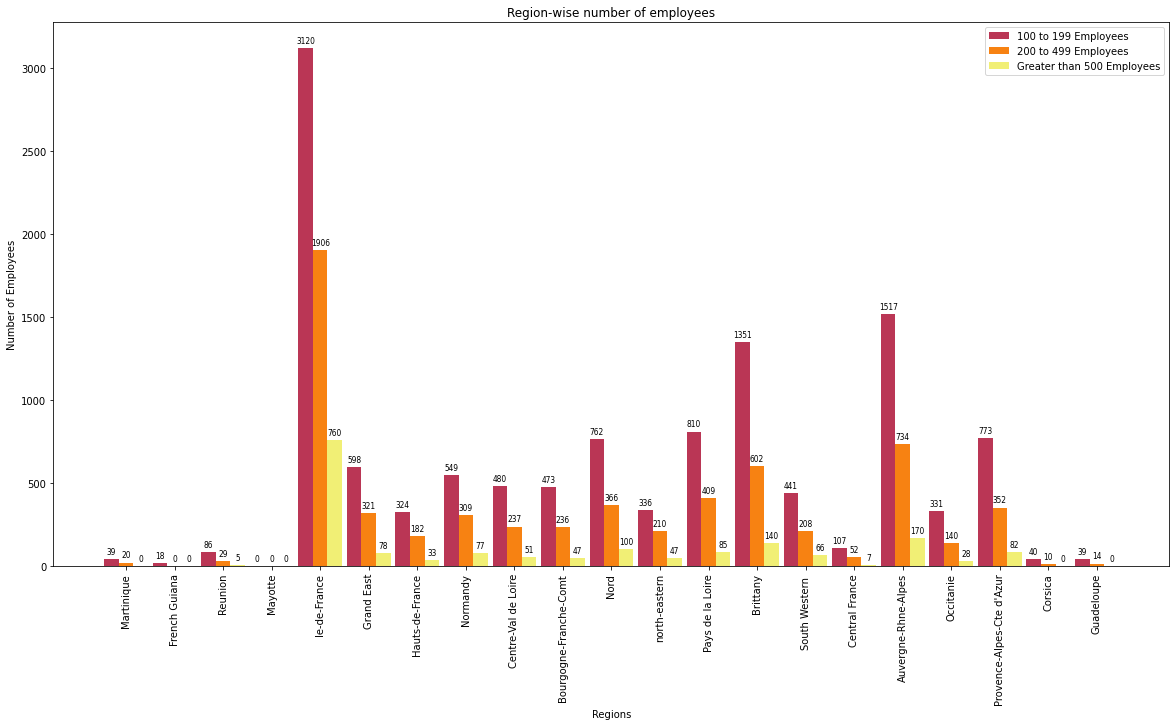

In [17]:
plt.figure(figsize=(20,10))
ind = np.arange(len(regions)) 
width = 0.3

colors = cm.inferno_r(np.linspace(.5, .05, 3))

bar1 = plt.bar(ind, _100to199_Sum, width, color = colors[0])
bar2 = plt.bar(ind+width, _200to499_Sum, width, color=colors[1])
bar3 = plt.bar(ind+width*2, _gt500_Sum, width, color = colors[2])

plt.xlabel('Regions')
plt.ylabel('Number of Employees')
plt.title('Region-wise number of employees')

plt.bar_label(bar1, padding=3, fontsize=7.5)
plt.bar_label(bar2, padding=3, fontsize=7.5)
plt.bar_label(bar3, padding=3, fontsize=7.5)

plt.xticks(ind+width,regions, rotation=90)
plt.legend( (bar1, bar2, bar3), ('100 to 199 Employees', '200 to 499 Employees', 'Greater than 500 Employees') )
fig.tight_layout()
plt.show()

We have used Pandas to get the sum of all the employees for the ranges 100 to 199, 200 to 499, and greater than 500 employees. After appending the results into the list, we visualize the output using the matlplotlib library using the bar graph. The magenta color represents regions having employees ranging from 100 to 199, orange represents regions having employees ranging from 200 to 499, and golden represents regions having employees greater than 500. We can see that France is the region where there are most employees and almost all the regions have employers which have employees in range of 100 to 199.

Getting the number of Towns for each Region and representing them in bar chart to visualize how many towns are there in each region

In [18]:
towns = {}
for region in regions:
    count = data[data['Region N'] == region]['Town'].count()
    towns[region] = count

In [19]:
towns

{'Martinique': 34,
 'French Guiana': 22,
 'Reunion': 24,
 'Mayotte': 17,
 'le-de-France': 1281,
 'Grand East': 2857,
 'Hauts-de-France': 2291,
 'Normandy': 3232,
 'Centre-Val de Loire': 1841,
 'Bourgogne-Franche-Comt': 3831,
 'Nord': 1545,
 'north-eastern': 2338,
 'Pays de la Loire': 1496,
 'Brittany': 5026,
 'South Western ': 3020,
 'Central France': 747,
 'Auvergne-Rhne-Alpes': 4184,
 'Occitanie': 1545,
 "Provence-Alpes-Cte d'Azur": 958,
 'Corsica': 360,
 'Guadeloupe': 32}

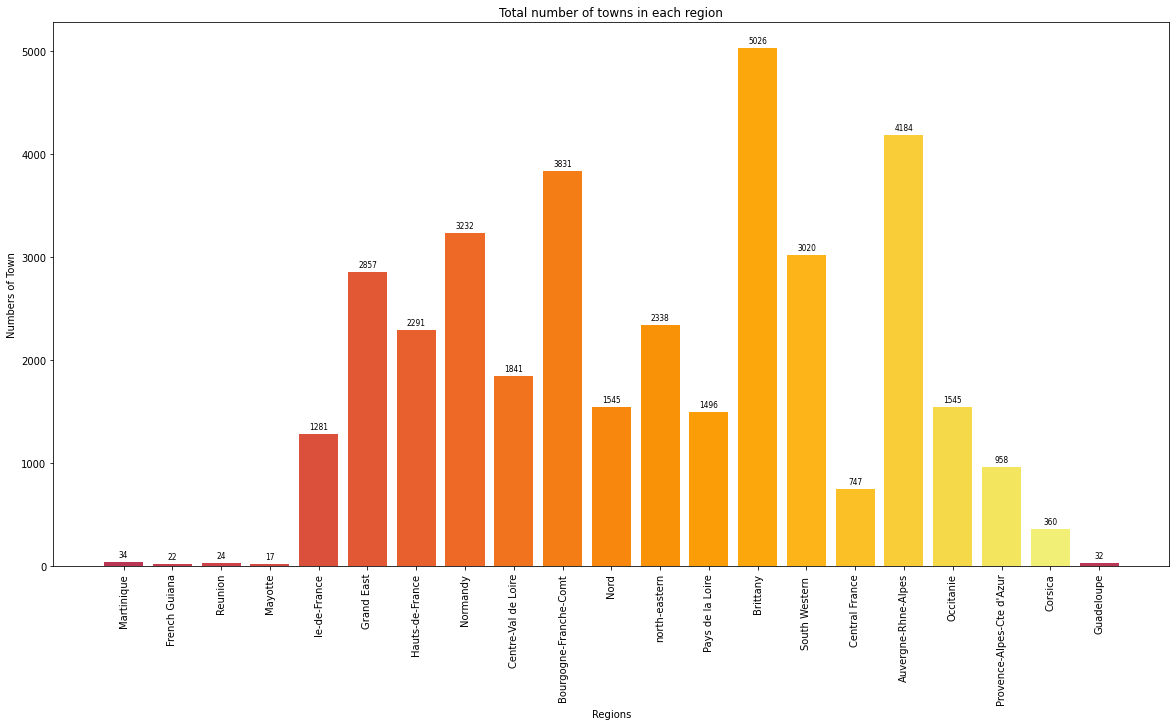

In [20]:
colors = cm.inferno_r(np.linspace(.5, .05, 20))
fig, ax = plt.subplots(figsize=(20,10))

bar1 = plt.bar(towns.keys(), towns.values(), align='center', color=colors)
plt.bar_label(bar1, padding=3, fontsize=7.5)
plt.xlabel('Regions')
plt.ylabel('Numbers of Town')
plt.title('Total number of towns in each region')
plt.xticks(rotation = 90)
plt.show()

# 3)

#### Determine if there is a correlation between number of employers (column E ) and overseas department ( column D ) and calculate basics elements such as mean of employers by region and represent it.

In [21]:
col1 = (data['Total Number of Employers'])
col2 = (data['Department Overseas (1 = yes 0 = no) '])

correlation = col1.corr(col2)

print("The correlation coefficient between the Number of Employers and Department Overseas column is:", correlation)

The correlation coefficient between the Number of Employers and Department Overseas column is: 0.02968931663993193


In [22]:
data.corr().style.background_gradient(cmap='icefire')

,Department Overseas (1 = yes 0 = no),Total Number of Employers,Unknown Size of Employers,1 to 5 employees,6 to 9 employees,10 to 19 employees,20 to 49 employees,50 to 99 employees,100 to 199 employees,200 to 499 employees,>500 employees
Department Overseas (1 = yes 0 = no),1.000000,0.029689,0.030633,0.026210,0.029127,0.026313,0.028231,0.029870,0.033277,0.035453,0.034772
Total Number of Employers,0.029689,1.000000,0.999489,0.996461,0.995297,0.993956,0.984406,0.969626,0.962369,0.943975,0.924913
Unknown Size of Employers,0.030633,0.999489,1.000000,0.993396,0.991979,0.990579,0.979331,0.963099,0.956575,0.938243,0.921855
1 to 5 employees,0.026210,0.996461,0.993396,1.000000,0.998088,0.996207,0.990042,0.978388,0.968586,0.949235,0.923146
6 to 9 employees,0.029127,0.995297,0.991979,0.998088,1.000000,0.998597,0.994095,0.983196,0.973983,0.955951,0.929608
10 to 19 employees,0.026313,0.993956,0.990579,0.996207,0.998597,1.000000,0.995787,0.985659,0.977239,0.959891,0.934023
20 to 49 employees,0.028231,0.984406,0.979331,0.990042,0.994095,0.995787,1.000000,0.992583,0.985338,0.970295,0.940543
50 to 99 employees,0.029870,0.969626,0.963099,0.978388,0.983196,0.985659,0.992583,1.000000,0.987325,0.974962,0.943851
100 to 199 employees,0.033277,0.962369,0.956575,0.968586,0.973983,0.977239,0.985338,0.987325,1.000000,0.979842,0.955842
200 to 499 employees,0.035453,0.943975,0.938243,0.949235,0.955951,0.959891,0.970295,0.974962,0.979842,1.000000,0.961836


To find out the correlation between the total numbef of employers and the department overseas column, we use the built-in function **.corr** of pandas. For the output we got, we can see from the correlation coefficient is **0.029689**, which means there is no or very little correlation between the total number of employers and the department overseas.

To extend this further, we also used the same function to find out the correlation among all the columns of the dataset, and the output we get is in terms of a matrix which gradient color. The correlation value of 1 or closer to 1 represents a strong correlation, whereas the value equal to closer to 0 represents that there is very weak or no correlation amongh the variables.

Finding out the mean number of employers region-wise

In [23]:
meanTotalEmployers = []
for region in regions:
    mean = data[data['Region N'] == region]['Total Number of Employers'].mean()
    meanTotalEmployers.append(mean)
    
sumTotalEmployers = []
for region in regions:
    sum_ = data[data['Region N'] == region]['Total Number of Employers'].sum()
    sumTotalEmployers.append(sum_)

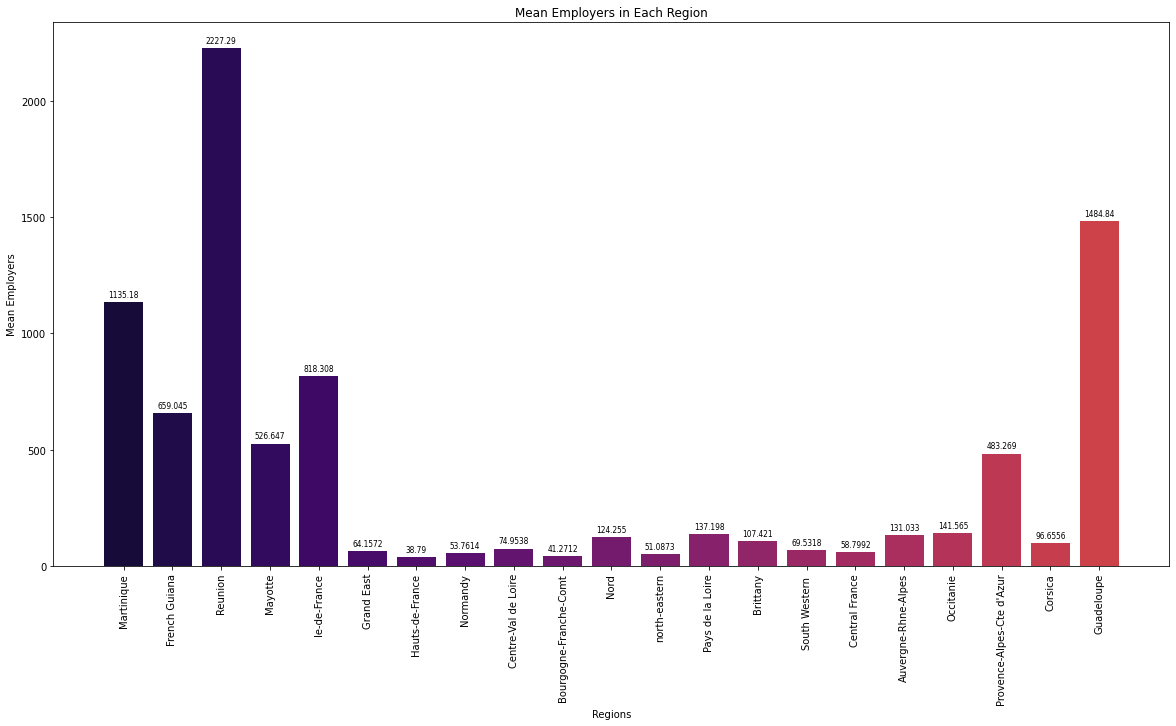

In [24]:
colors = cm.inferno_r(np.linspace(.9, .45, 21))
fig, ax = plt.subplots(figsize=(20,10))

bar1 = plt.bar(regions, meanTotalEmployers, align='center', color=colors)
plt.bar_label(bar1, padding=3, fontsize=7.5)
plt.xlabel('Regions')
plt.ylabel('Mean Employers')
plt.title('Mean Employers in Each Region')
plt.xticks(rotation = 90)
plt.show()

The highest number of mean total employers are in Reunion region, which shows that despite the fact that this region has a smaller number of towns (only 24 towns), it has a high ratio of employers compared to other regions. Same is the case for Guadeloupe and Martinique, both of them have town count of 32 and 34 respectively, but the number of employers in these regions is very large compared to its size and town count.

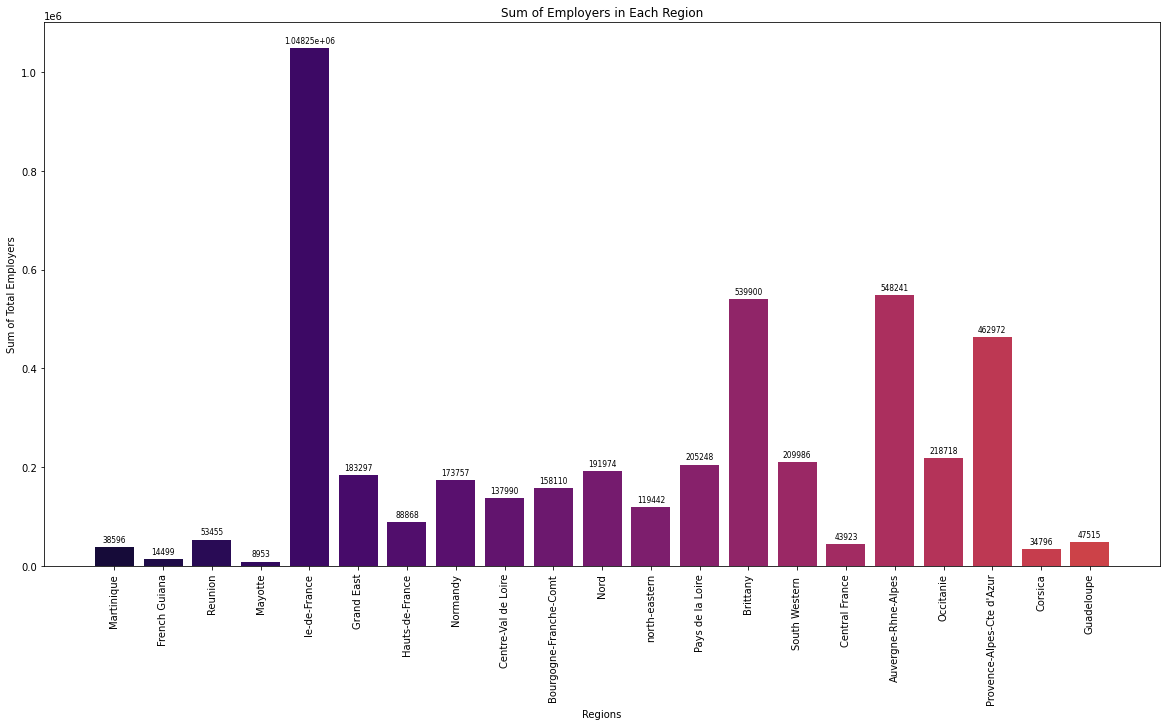

In [25]:
colors = cm.inferno_r(np.linspace(.9, .45, 21))
fig, ax = plt.subplots(figsize=(20,10))

bar1 = plt.bar(regions, sumTotalEmployers, align='center', color=colors)
plt.bar_label(bar1, padding=3, fontsize=7.5)
plt.xlabel('Regions')
plt.ylabel('Sum of Total Employers')
plt.title('Sum of Employers in Each Region')
plt.xticks(rotation = 90)
plt.show()

This chart allows us to analyze that as seen from the bar chart in Q2 that Brittany has the most number of towns, but it has a lower number of employers compared to France whose town count is almost half of the Brittany. Thus, we can say that France has more opportunities as compared to other regions. And from the mean graph, we can say that despite a very small number of towns in Reunion (24 towns), it has a huge number of employers, therefore it has higher mean of the total employers.

# 4)

#### perform a simple linear regression with the data available ( of your choice ) where we compare two variables.

We build the linear regression model based on the Total Number of Employers and Unknown Size of Employers, and our target variable is to predict '200 to 499 employees'. So we first filter our original dataset to get only the required columns.

In [26]:
regressionData = data.iloc[:,4:]
regressionData.columns = regressionData.columns.str.replace(' ', '')
regressionData = regressionData.add_prefix('_')

We use the **describe** function of the pandas to get some statistics of the filtered dataset.

In [27]:
regressionData.describe()

,_TotalNumberofEmployers,_UnknownSizeofEmployers,_1to5employees,_6to9employees,_10to19employees,_20to49employees,_50to99employees,_100to199employees,_200to499employees,_>500employees
count,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000
mean,123.456067,83.555301,27.291486,5.220550,3.800333,2.296448,0.738339,0.332434,0.172760,0.048417
std,2353.384846,1729.874812,432.062116,83.685519,60.961216,32.597382,9.882131,4.850211,2.783668,1.091031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,14.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.000000,39.000000,11.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,427385.000000,316603.000000,76368.000000,14836.000000,10829.000000,5643.000000,1658.000000,812.000000,456.000000,180.000000


Splitting the dataset into test and train so that we can also assess the overall accuracy of the model. In the following chunk of code, the trainSize represents the percent of training dataset to be used, and testSize represents the percent of test dataset to be used.

In [28]:
trainSize = int(0.75 * len(regressionData))

regressionDataTrain = regressionData.iloc[0:trainSize, :]
regressionDataTest = regressionData.iloc[trainSize:, :]

### Model
Ordinary Least Square Regression Feature:

    * Dependent Variable (Response Variable): _200to499Employees
    * Independent Variable (Explanatory Variable): Total Number of Employers, and Unknown Size of Employers
   

In [29]:
model = str('_200to499employees ~ _TotalNumberofEmployers + _UnknownSizeofEmployers')

train_m1_fit = smf.ols(model, data= regressionDataTrain).fit()
print(train_m1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:     _200to499employees   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.704e+05
Date:                Thu, 23 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:05:32   Log-Likelihood:                -34272.
No. Observations:               27510   AIC:                         6.855e+04
Df Residuals:                   27507   BIC:                         6.857e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

This is the ordinary regression model result of dependent variables _200to499employees with the inpedendent variables Total Number of Employers, and Unknown Size of Employers. There is a linear relationship between these variables and we can also see that p-value for the intercept is **0.001** which means that our that our parameters which we have used as independent variables are statistically significant.
